In [19]:
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister
from qiskit import Aer,BasicAer,execute
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram, plot_state_city
%matplotlib inline
simulator_mps=Aer.get_backend('qasm_simulator');
backend_opts_mps={"method":"matrix_product_state"}

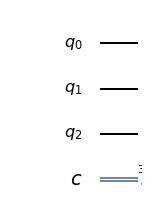

In [20]:
N_node_qubit=2
N_qubit=1+N_node_qubit

q=QuantumRegister(N_qubit,'q')
c=ClassicalRegister(N_qubit,'c')
circ=QuantumCircuit(q,c)
circ.draw(output='mpl')

In [21]:
# step number
N_step = 4;

# initial state for coin (default: |0>)
coin_init = 1;
if coin_init == 0:
    circ.id (q[0]);
elif coin_init == 1:
    circ.x (q[0]);
elif coin_init == 1+1j:
    circ.h (q[0]);

# start point
k_init = [0,0];
for n in range(2):
    if k_init[n] == 1:
        circ.x (q[n+1]);
    elif k_init[n] == 0:
        circ.id (q[n+1]);

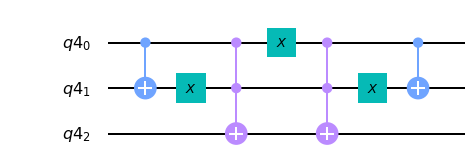

In [22]:
shift_q = QuantumRegister(3); # register: 3-qubit
shift_circ = QuantumCircuit(shift_q, name='shift_circ');
# forward
shift_circ.cx (shift_q[0], shift_q[1]);
shift_circ.x (shift_q[1]);
shift_circ.ccx (shift_q[0], shift_q[1], shift_q[2]);
#
shift_circ.x (shift_q[0]);
# backward
shift_circ.ccx (shift_q[0], shift_q[1], shift_q[2]);
shift_circ.x (shift_q[1]);
shift_circ.cx (shift_q[0], shift_q[1]);
shift_gate = shift_circ.to_instruction();
shift_circ.draw ('mpl')


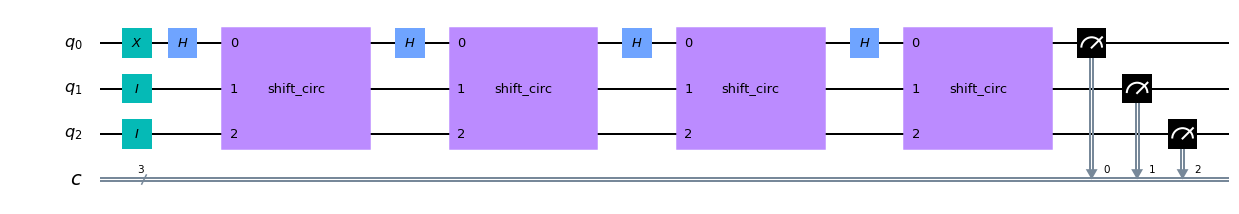

In [23]:
# start walk
for i in range(N_step):
    circ.h (q[0]); # coin operation; coin qubit=q[0]
    circ.append (shift_gate, [q[0], q[1], q[2]]); # shift operation      
# measurement
circ.measure ([q[0], q[1], q[2]], [c[0], c[1], c[2]]);
circ.draw(output='mpl')


step:  4
start:  [0, 0]
initial coin: 1
run time: 0.33960485458374023 sec
{'101': 8192}


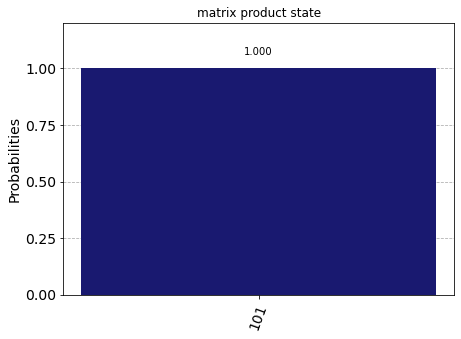

In [24]:
# execute: matrix product state
job_sim_mps = execute([circ], QasmSimulator(), backend_options=backend_opts_mps, shots=8192);
result_mps = job_sim_mps.result();
counts = result_mps.get_counts();

# print results
print("step: ", N_step)
print("start: ", k_init)
print("initial coin:", coin_init)
print("run time: {} sec".format(result_mps.time_taken))
print(counts)
plot_histogram(counts, color='midnightblue', title='matrix product state')

4 -step circuit
initial point at: [0, 0]


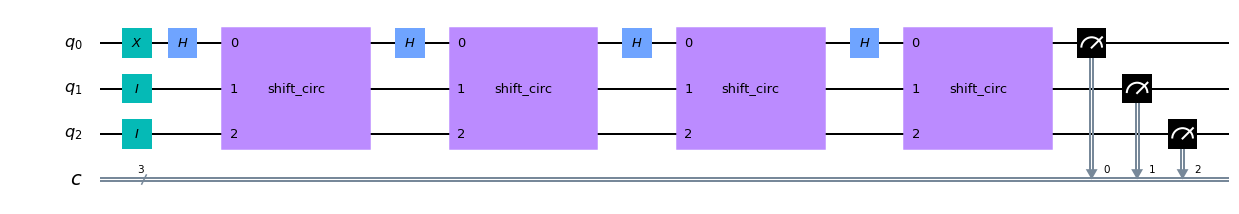

In [25]:
print(N_step,"-step circuit")
print("initial point at:", k_init)
circ.draw(output='mpl')